THE RISK-ESTIMATION BIAS-VARIANCE TRADEOFF

author: [@sparshsah](https://github.com/sparshsah)

# Setting

Suppose you have a series of observations $(r_1,\, r_2,\, \dots,\, r_{T})$ where each observation is i.i.d. Normal with ground-truth mean $\mu$ and ground-truth variance $\sigma^2$.

# Estimators

Consider three estimators for $\sigma^2$. We're implicitly going to consider Mean Squared Error (MSE) as our loss function when evaluating them, but MSE isn't necessarily the best one. Which loss function is most appropriate can depend on the setting and application. For example, maybe in your particular use case, underestimating $\sigma^2$ is more dangerous than overestimating.


## Standard Bessel-corrected demeaned sample variance estimator

Define
$$s^2_A := \frac{1}{T-1} \sum(r_t - \bar{r})^2.$$

This will be distributed as
$$\frac{1}{T-1}\sigma^2\chi^2_{T-1}.$$

Its bias is $0$, so its squared bias is also $0$.

Its squared standard error is $\frac{1}{(T-1)^2}\sigma^4 2(T-1) = 2\frac{1}{T-1}\sigma^4$.

The sum of its squared bias plus squared standard error is
$$2\frac{1}{T-1}\sigma^4.$$

This has one undesirable property in the case I mentioned before: If underestimating $\sigma^2$ is more dangerous than overestimating. This estimator will grossly underestimate, for instance, if all the $r$'s just randomly happen to come out to the same number.


## Overriden zero-meaned sample variance estimator

Define
$$s^2_B := \frac{1}{T} \sum r_t^2.$$

This will be distributed as
$$\mu^2 + \frac{1}{T}\sigma^2\chi^2_{T}.$$

Its bias is $\mu^2$, so its squared bias is $\mu^4$.

Its squared standard error is $\frac{1}{T^2}\sigma^4 2T = 2\frac{1}{T}\sigma^4$.

The sum of its squared bias plus squared standard error is
$$\mu^4 + 2\frac{1}{T}\sigma^4.$$


## Minimum-MSE sample variance estimator

Define
$$s^2_C := \frac{1}{T+1} \sum(r_t - \bar{r})^2.$$

This is the best you can do in terms of MSE [[cf](https://web.archive.org/web/20210522072302/https://en.wikipedia.org/wiki/Mean_squared_error#Variance)], but I'm not sure what its distribution is.

# MSE-dominance crossover Sharpe

Let's compare $s^2_B$ vs $s^2_A$. When will the overriden estimator's sum of squared bias plus squared standard error be better (i.e. smaller) than the standard's?

Well, when
$$\mu^4 + 2\frac{1}{T}\sigma^4 < 2\frac{1}{T-1}\sigma^4$$
$$\mu^4 < 2\left(\frac{1}{T-1} - \frac{1}{T}\right)\sigma^4$$
$$\mu^4 < 2\frac{1}{(T-1)T}\sigma^4$$
$$\mu < \sqrt[4]{2\frac{1}{(T-1)T}}\sigma$$
$$\frac{\mu}{\sigma} < \sqrt[4]{2\frac{1}{(T-1)T}}.$$

We'll call this threshold the "crossover Sharpe".

## Upshot

For example, if $T = 65$ days, then $s^2_B$ will have a lower sum-of-squared-bias-plus-squared-standard-error (i.e. lower MSE) than $s^2_A$ as long as the ratio of $\mu$ to $\sigma$ (each for a single observation, i.e. a single day) is less than $\approx 0.148$ (i.e. a daily Sharpe less than $\approx 0.148$). In other words: With a single business quarter of daily-returns data, the zero-meaned estimator would be better (from an MSE perspective) than the demeaned estimator as long as the asset's ground-truth business-annualized Sharpe was less than $\approx 261^{0.5} \cdot 0.148 = 2.39$ (keep in mind there are $261$ business days per year). A business quarter is a reasonable and popular estimation horizon (to deal with the fact that market data-generating processes are highly non-stationary), and most assets' ground-truth annualized Sharpes are much less than $2.39$, so this is a pretty common scenario.

_On the other hand_: Even if you had a full business century ($T = 100 \cdot 261 = 26,100$ days) of daily-returns data, the zero-meaned estimator would _still_ be better as long as the asset's ground-truth daily Sharpe was less than $\approx 0.0074$, which annualizes to $\approx 261^{0.5} \cdot 0.0074 \approx 0.12$ -- A surprisingly high figure in my eyes. Put another way: There are commodities out there whose ground-truth annualized Sharpes are widely assumed to be around $0.10$. This result says that even if you had high-quality daily returns data going back to 1922, you should _still_ use the zero-meaned variance estimator if you want to get lower expected squared estimation error.


## An interesting observation: Annualized crossover Sharpe is asymptotically frequency-independent

I'm going to induce a general claim from a brute-force-plug-and-chug exercise below. (The proof of the claim will be left to the reader, because it's easy to see---just divide your sample size $T$ by your chosen annualizer $D$ in the formula---but annoying to type out.)

The claim is that, although at shorter horizons the crossover Sharpe with annual data is higher than the crossover Sharpe with daily data, at longer horizons the crossover Sharpe with the coarser data converges down to the crossover Sharpe with the finer data.

$\qquad$At least at short horizons, this intuitively makes sense: Two years of coarse observations leaves us with only $2$ observations, which doesn't do a whole lot to compress standard errors; The observed mean is still going to be pretty noisy, which is the whole issue at hand. But two years of fine daily observations is $2 * 261 = 522$ observations, which is plenty of time for the CLT to compress the standard errors.

### Blowup

* Consider the case $T = 65$ days. We know that the annualized crossover Sharpe is $2.39$.
* Consider the case $T = 0.25$ years. The solution blows up, which makes sense (what does it mean to have a one-fourth-of-one observation?).

### Short horizon

* Consider the case $T = 2 * 261 = 522$ days. The annualized crossover Sharpe will be $0.84$.
* When $T = 2$ years, the annualized crossover Sharpe will be $1.0$. (Note that whereas with daily observations we needed a $261^{0.5}$ factor to annualized the solution, it's unnecessary here -- we're already working with annual observations. You can just plug $2$ into the formula directly.)

### Medium horizon

* When $T = 5 * 261 = 1305$ days, the annualized crossover Sharpe will be $0.53$.
* When $T = 5$ years, the annualized crossover Sharpe will be $0.56$.

### Long horizon

* When $T = 10 * 261 = 2610$ days, the annualized crossover Sharpe will be $0.38$.
* When $T = 10$ years, the annualized crossover Sharpe will be $0.38$ also.

# Simulations

In [1]:
import pandas as pd
import numpy as np
# https://github.com/sparshsah/foggy-lib/blob/main/util/foggy_pylib/core.py
import foggy_pylib.core as fc
# https://github.com/sparshsah/foggy-lib/blob/main/util/foggy_pylib/fin.py
import foggy_pylib.fin as ff

## How does the annualized crossover Sharpe decay with sample size?

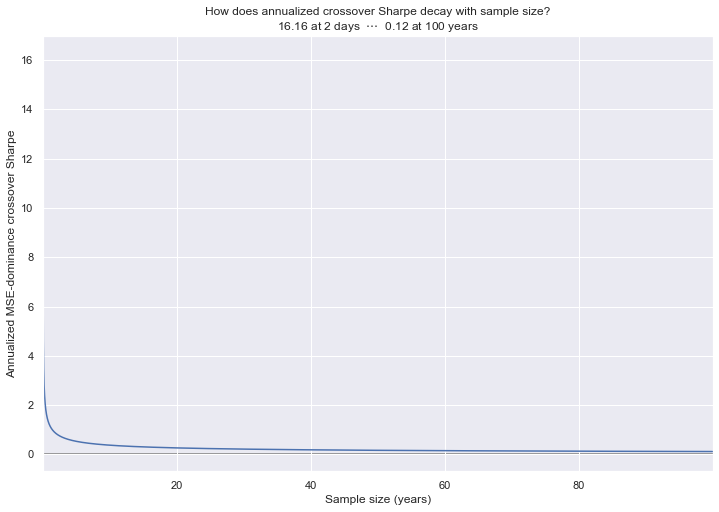

In [2]:
MIN_T_DAYS = 2  # need at least 2 data points for the standard estimator to be defined
MAX_T_DAYS = ff.DAYCOUNTS["BY"] * 100  # a century

def __get_daily_crossover_sharpe(T_days: int=ff.DAYCOUNTS["BQ"]) -> float:
    numerator = 2
    denominator = (T_days-1) * T_days
    fraction = numerator / denominator
    answer = fraction **(1/4)
    return answer

def _get_ann_crossover_sharpe(T_days: int=ff.DAYCOUNTS["BQ"]) -> float:
    daily_crossover_sharpe = __get_daily_crossover_sharpe(T_days=T_days)
    ann_crossover_sharpe = ff.DAYCOUNTS["BY"]**0.5 * daily_crossover_sharpe
    return ann_crossover_sharpe

def get_ann_crossover_sharpes() -> ff.FloatSeries:
    ann_crossover_sharpes = pd.Series({T_days:
        _get_ann_crossover_sharpe(T_days=T_days)
    for T_days in range(MIN_T_DAYS, MAX_T_DAYS)})
    return ann_crossover_sharpes

def plot_ann_crossover_sharpes() -> None:
    s = get_ann_crossover_sharpes()
    # convert from T_days to T_years
    s.index = s.index/ff.DAYCOUNTS["BY"]
    fc.plot(
        s,
        xlabel="Sample size (years)",
        ylabel="Annualized MSE-dominance crossover Sharpe",
        title="How does annualized crossover Sharpe decay with sample size?\n" + \
            f"{s.values[0]:.2f} at {int(s.index[0] * ff.DAYCOUNTS['BY'])} days" + \
            r"  $\cdots$  " + \
            f"{s.values[-1]:.2f} at {s.index[-1]:.0f} years"
    )

plot_ann_crossover_sharpes()

## Does it really make a difference?

No... either my math is wrong, or my code is. lol.

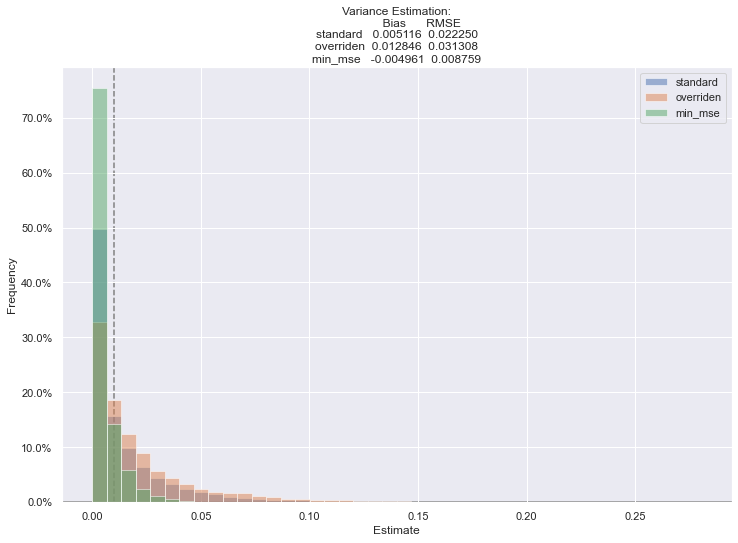

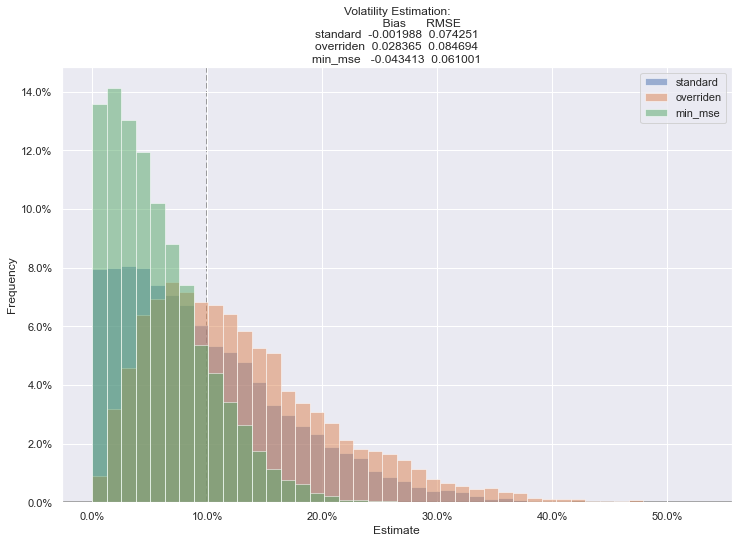

In [3]:
# let's choose an extremely low sharpe (0) and short sample size (2 days)
LOW_SHARPE = 0
SHORT_T_YEARS = 2/261
N_SIMS = 10_000

def _get_est(as_var: bool=False) -> ff.FloatSeries:
    r = ff._sim_r(ann_sharpe=LOW_SHARPE, sz_in_years=SHORT_T_YEARS)
    est = fc.get_series([
        ("standard", ff._get_est_vol_of_r(r=r, de_avg_kind="mean")),
        ("overriden", ff._get_est_vol_of_r(r=r, de_avg_kind=None)),
        ("min_mse", ff._get_est_vol_of_r(r=r, de_avg_kind="mean", bessel_degree=-1))
    ])
    est = est**2 if as_var else est
    return est

def get_ests(as_var: bool=False) -> ff.FloatDF:
    ests = pd.DataFrame([_get_est(as_var=as_var) for _ in range(N_SIMS)])
    return ests

def plot_ests(as_var: bool=False) -> None:
    bmk = ff.DEFAULT_VOL**2 if as_var else ff.DEFAULT_VOL
    np.random.seed(42)
    ests = get_ests(as_var=as_var)
    perf = fc.get_df([
        ("Bias", (ests-bmk).mean()),
        ("RMSE", ((ests-bmk)**2).mean() **0.5)
    ])
    fc.plot(
        ests, kind="histpct",
        bins=42, alpha=0.50,
        axvline_locs=[bmk],
        axvline_styles=["--"],
        xpct=not as_var,
        xlabel="Estimate",
        ylabel="Frequency",
        title=f"{'Variance' if as_var else 'Volatility'} Estimation:\n{perf}"
    )

plot_ests(as_var=True)
plot_ests(as_var=False)

## How punitive is the overriden Sharpe estimator on a century of live data?

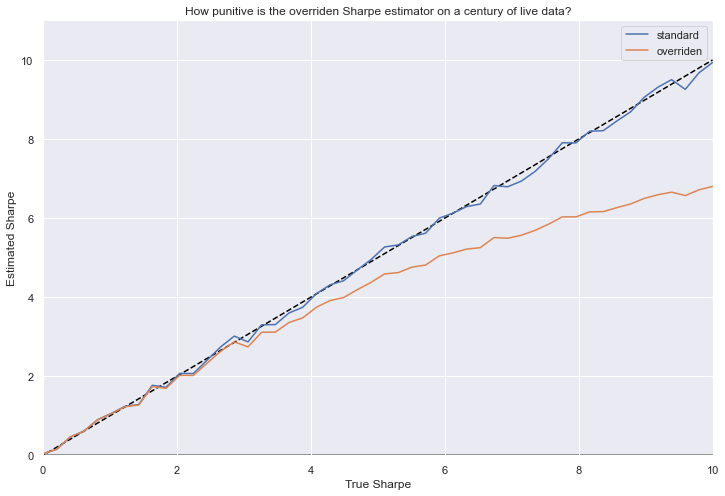

In [4]:
def _get_est(true_sharpe: float=0) -> ff.FloatSeries:
    r = ff._sim_r(ann_sharpe=true_sharpe)
    est = fc.get_series([
        ("standard", ff._get_est_sharpe_of_r(r=r, de_avg_kind="mean")),
        ("overriden", ff._get_est_sharpe_of_r(r=r, de_avg_kind=None)),
        # at this horizon, the min MSE estimator is indistinguishable from standard
        # ("min_mse", ff._get_est_sharpe_of_r(r=r, de_avg_kind="mean", bessel_degree=-1))
    ])
    return est

def get_ests() -> ff.FloatDF:
    ests = pd.DataFrame({true_sharpe:
        _get_est(true_sharpe=true_sharpe)
    for true_sharpe in np.linspace(0,10)}).T
    return ests

def plot_ests() -> None:
    np.random.seed(42)
    ests = get_ests()
    ax = fc.get_y_equals_x_plot_base(lim=10)
    fc.plot(
        ests,
        xlabel="True Sharpe",
        ylabel="Estimated Sharpe",
        title="How punitive is the overriden Sharpe estimator on a century of live data?",
        ax=ax,
        # override from the ax
        ylim_bottom=0
    )

plot_ests()